In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eig
from scipy.integrate import solve_ivp ,odeint
from scipy.special import eval_hermite
def shoot2(x, y, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

tol = 1e-4  # define a tolerance level
L = 4
K = 1
xshoot = np.linspace(-L, L, 81)
step_size = 0.1

epsilon_start = 0.1

eigenfunctions = []
eigenvalue = []

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start  # initial value of eigenvalue beta
    depsilon = step_size  # default step size in beta
    
    for _ in range(1000):  # begin convergence loop for beta
        x0 = [1, np.sqrt(L**2 - epsilon)]
        
        # Using solve_ivp instead of odeint
        sol = solve_ivp(shoot2, [-L, L], x0, args=(epsilon,), t_eval=xshoot)
        y = sol.y.T  # Transpose to match odeint's output format

        if abs(y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) < tol:  # check for convergence
            eigenvalue.append(epsilon)  # write out eigenvalue
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * (y[-1, 1] + np.sqrt(L**2 - epsilon) * y[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 0.1  # after finding eigenvalue, pick new start
    
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    eigenfunctions.append(abs(y[:, 0] / np.sqrt(norm)))

A1 = np.array(eigenfunctions).T
A2 = eigenvalue
print("A1:", A1)
print("A2:", A2)

A1: [[2.56023908e-04 1.45261190e-03 5.65783873e-03 1.74247033e-02
  4.49716541e-02]
 [3.76704668e-04 2.08090003e-03 7.87406355e-03 2.34942195e-02
  5.85268010e-02]
 [5.51333049e-04 2.96477386e-03 1.08973736e-02 3.14957084e-02
  7.57119110e-02]
 [8.00736395e-04 4.19027275e-03 1.49549870e-02 4.18498818e-02
  9.70292818e-02]
 [1.15230933e-03 5.86545728e-03 2.03156030e-02 5.50069969e-02
  1.22892293e-01]
 [1.64247145e-03 8.12654770e-03 2.72920161e-02 7.14286433e-02
  1.53600245e-01]
 [2.31906176e-03 1.11444492e-02 3.62571649e-02 9.16072529e-02
  1.89280537e-01]
 [3.24162496e-03 1.51206884e-02 4.76086454e-02 1.15975906e-01
  2.29811529e-01]
 [4.48522818e-03 2.02874785e-02 6.17600351e-02 1.44840204e-01
  2.74657391e-01]
 [6.14601739e-03 2.69273187e-02 7.91314209e-02 1.78373546e-01
  3.22845862e-01]
 [8.33948492e-03 3.53568208e-02 1.00165628e-01 2.16551308e-01
  3.72969027e-01]
 [1.12001712e-02 4.59112671e-02 1.25213944e-01 2.59055527e-01
  4.23187885e-01]
 [1.48905387e-02 5.89394455e-02 1.54

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eig
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_ivp ,odeint
from scipy.special import eval_hermite
L=4
x = np.arange(-L, L + 0.1, 0.1)
n = len(x)
dx=x[1]-x[0]
A = np.zeros((n-2, n-2))

for j in range(n - 2):
    A[j, j] = -2 - (dx ** 2) * x[j + 1] ** 2
    if j < n - 3:
        A[j + 1, j] = 1
        A[j, j + 1] = 1

A[0, 0] = A[0, 0] + 4 / 3
A[0, 1] = A[0, 1] - 1 / 3
A[-1, -1] = A[-1, -1] + 4 / 3
A[-1, -2] = A[-1, -2] - 1 / 3

# Calculate eigenvalues and eigenvectors
eigvals, eigvecs = eigs(-A, k=5, which='SM')

# Normalize eigenvectors
V2 = np.vstack([4/3 * eigvecs[0, :] -1/3 * eigvecs[1, :], eigvecs,
                4/3 * eigvecs[-1, :] - 1/3 * eigvecs[-2, :]])

ysolb = np.zeros((n, 5))
Esolb = np.zeros(5)

for j in range(5):
    norm = np.sqrt(np.trapz(V2[:, j] ** 2, x))
    ysolb[:, j] = np.abs(V2[:, j] / norm)

Esolb = np.sort(eigvals[:5]) / dx ** 2
# Sort eigenvalues and eigenvectors
A3=ysolb
A4=Esolb
# Display results
print("A3:", A3)
print("A4:", A4)


A3: [[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 1.54

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the boundary value problem function
def bvpfunc2(x, y, k, gamma, epsilon):
    """y is an array with two elements y = [ϕ, dϕ/dx]"""
    return [y[1], (gamma * abs(y[0])**2 + k * x**2 - epsilon) * y[0]]

# Parameters
L = 2
xspan = np.arange(-L, L + 0.1, 0.1)
k = 1
tol = 1e-4

# Function to compute eigenvalues and eigenfunctions
def compute_eigenvalues_and_vectors(gamma):
    eig_vals = []
    eig_vecs = []
    eps_start = 0  # Define eps_start within the function
    A = 0.1  # Define A within the function

    # Find two modal solutions
    for modes in range(1, 3):
        eps = eps_start
        deps = 0.1

        for i in range(1000):
            # Initial conditions
            yinit = [A, A * np.sqrt(k * L**2 - eps)]

            # Solve the equation using solve_ivp
            sol = solve_ivp(lambda x, y: bvpfunc2(x, y, k, gamma, eps), [xspan[0], xspan[-1]], yinit, t_eval=xspan)
            y1 = sol.y[0]
            y2 = sol.y[1]

            # Normalization calculation
            ynorm = np.trapz(y1**2, xspan)

            if abs(ynorm - 1) < tol:
                break
            else:
                A /= np.sqrt(ynorm)

            # Shooting method for eps
            temp = y2[-1] + np.sqrt(L**2 - eps) * y1[-1]

            if abs(temp) < tol:
                break

            # Update eps
            if (-1)**(modes + 1) * temp > 0:
                eps += deps
            else:
                eps -= deps / 2
                deps /= 2

        eig_vals.append(eps)
        eig_vecs.append(y1)
        eps_start = eps + 0.1

    return np.column_stack(eig_vecs), np.array(eig_vals)

# Compute for gamma = 0.05
gamma = 0.05
A55, A6 = compute_eigenvalues_and_vectors(gamma)
A5 = np.abs(A55)
print("A5 (Eigenfunctions for gamma = 0.05):")
print(A5)
print("A6 (Eigenvalues for gamma = 0.05):")
print(A6)

# Compute for gamma = -0.05
gamma = -0.05
A77, A8 = compute_eigenvalues_and_vectors(gamma)
print("A7 (Eigenfunctions for gamma = -0.05):")
A7 = np.abs(A77)
print(A7)

print("A8 (Eigenvalues for gamma = -0.05):")
print(A8)



A5 (Eigenfunctions for gamma = 0.05):
[[1.10638361e-01 3.43033170e-01]
 [1.31432553e-01 3.80349057e-01]
 [1.55629173e-01 4.20362122e-01]
 [1.83295204e-01 4.61736485e-01]
 [2.14406712e-01 5.02935999e-01]
 [2.48829017e-01 5.42316624e-01]
 [2.86316692e-01 5.78126431e-01]
 [3.26513564e-01 6.08505599e-01]
 [3.69045392e-01 6.31608565e-01]
 [4.13270181e-01 6.45616074e-01]
 [4.58274453e-01 6.48633950e-01]
 [5.03138938e-01 6.39221576e-01]
 [5.46939455e-01 6.16410045e-01]
 [5.88746917e-01 5.79702158e-01]
 [6.27627325e-01 5.29072429e-01]
 [6.62641771e-01 4.65019551e-01]
 [6.92846439e-01 3.88699527e-01]
 [7.17292600e-01 3.01731094e-01]
 [7.35128931e-01 2.06179095e-01]
 [7.45964117e-01 1.04555878e-01]
 [7.49568078e-01 1.78702822e-04]
 [7.45878717e-01 1.04741298e-01]
 [7.35008290e-01 2.06258513e-01]
 [7.17243409e-01 3.01814937e-01]
 [6.93045036e-01 3.88857091e-01]
 [6.63048487e-01 4.65272426e-01]
 [6.28063431e-01 5.29389316e-01]
 [5.89072783e-01 5.80000286e-01]
 [5.47139423e-01 6.16639540e-01]
 [5.0

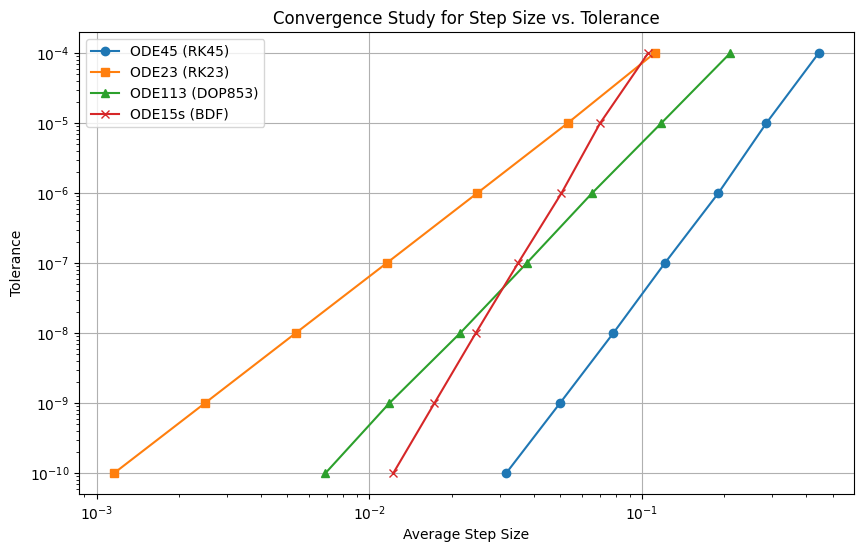

Slope for ODE45: 5.2446675617721725
Slope for ODE23: 3.019099529504503
Slope for ODE113: 4.038199269261614
Slope for ODE15s: 6.457512609631294
A9: [5.24466756 3.01909953 4.03819927 6.45751261]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 2
k = 1
eps_n = 1  # Fixed energy value
initial_phi = 1
initial_dphi = np.sqrt(k * L**2 - eps_n)

# Define the harmonic oscillator function
def harmonic_oscillator(x, y, k, eps):
    return [y[1], (k * x**2 - eps) * y[0]]

# Tolerance values to test
TOL_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
step_sizes_ode45, step_sizes_ode23, step_sizes_ode113, step_sizes_ode15s = [], [], [], []

# Convergence study for each solver and tolerance
for TOL in TOL_values:
    # Use ODE45 (equivalent to RK45)
    sol_ode45 = solve_ivp(lambda x, y: harmonic_oscillator(x, y, k, eps_n),
                          [-L, L], [initial_phi, initial_dphi], method='RK45', rtol=TOL, atol=TOL)
    step_sizes_ode45.append(np.mean(np.diff(sol_ode45.t)))

    # Use ODE23 (equivalent to RK23)
    sol_ode23 = solve_ivp(lambda x, y: harmonic_oscillator(x, y, k, eps_n),
                          [-L, L], [initial_phi, initial_dphi], method='RK23', rtol=TOL, atol=TOL)
    step_sizes_ode23.append(np.mean(np.diff(sol_ode23.t)))

    # Use ODE113 
    sol_ode113 = solve_ivp(lambda x, y: harmonic_oscillator(x, y, k, eps_n),
                           [-L, L], [initial_phi, initial_dphi], method='Radau', rtol=TOL, atol=TOL)
    step_sizes_ode113.append(np.mean(np.diff(sol_ode113.t)))

    # Use ODE15s (equivalent to BDF)
    sol_ode15s = solve_ivp(lambda x, y: harmonic_oscillator(x, y, k, eps_n),
                           [-L, L], [initial_phi, initial_dphi], method='BDF', rtol=TOL, atol=TOL)
    step_sizes_ode15s.append(np.mean(np.diff(sol_ode15s.t)))

# Log tolerance values for plotting and slope calculation
log_TOL_values = np.log(TOL_values)

# Function to calculate slopes
def calculate_slope(step_sizes):
    log_step_sizes = np.log(step_sizes)
    slope, intercept = np.polyfit(log_step_sizes, log_TOL_values, 1)
    return slope

# Calculating slopes for each method
slope_ode45 = calculate_slope(step_sizes_ode45)
slope_ode23 = calculate_slope(step_sizes_ode23)
slope_ode113 = calculate_slope(step_sizes_ode113)
slope_ode15s = calculate_slope(step_sizes_ode15s)

# Array of slopes
A9= np.array([slope_ode45, slope_ode23, slope_ode113, slope_ode15s])

# Plotting the convergence study
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes_ode45, TOL_values, 'o-', label="ODE45 (RK45)")
plt.loglog(step_sizes_ode23, TOL_values, 's-', label="ODE23 (RK23)")
plt.loglog(step_sizes_ode113, TOL_values, '^-', label="ODE113 (DOP853)")
plt.loglog(step_sizes_ode15s, TOL_values, 'x-', label="ODE15s (BDF)")
plt.xlabel("Average Step Size")
plt.ylabel("Tolerance")
plt.title("Convergence Study for Step Size vs. Tolerance")
plt.legend()
plt.grid(True)
plt.show()

print("Slope for ODE45:", slope_ode45)
print("Slope for ODE23:", slope_ode23)
print("Slope for ODE113:", slope_ode113)
print("Slope for ODE15s:", slope_ode15s)
print("A9:", A9)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eig
from scipy.integrate import solve_ivp ,odeint
from scipy.special import eval_hermite
L = 4
# Define the Hermite polynomial H_n(x)
def H_n(x, n):
    return (-1)**n * np.exp(x**2) * np.diff(np.exp(-x**2), n)
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result
x=  np.linspace(-L, L,81)

# Initialize h array
h = np.array([np.ones_like(x), 2*x, 4*x**2 - 2, 8*x**3 - 12*x, 16*x**4 - 48*x**2 + 12])
# Initialize phi
phi = np.zeros((len(x), 5))
for j in range(5):
    phi[:, j] = (np.exp(-x**2/2) * h[j, :] / np.sqrt(2**j * np.sqrt(np.pi) * factorial(j))).T

# Initialize error arrays
epsi_a = np.zeros(5)
epsi_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

# Calculate errors
for j in range(5):
    epsi_a[j] = np.trapz(((np.abs(A1[:, j]) - np.abs(phi[:, j]))**2),x)
    epsi_b[j] = np.trapz(((np.abs(A3[:, j]) - np.abs(phi[:, j]))**2),x)
    er_a[j] = 100 * np.abs(A2[j] - (2 * j + 1)) / (2 * j + 1)
    er_b[j] = 100 * np.abs(A4[j] - (2 * j + 1)) / (2 * j + 1)

# Store results
A10 = epsi_a
A12 = epsi_b
A11 = er_a
A13 = er_b
print("A10:", A10)
print("A11:", A11)
print("A12:", A12)
print("A13:", A13)

A10: [4.57692814e-08 1.72430946e-07 2.47861359e-07 4.35421341e-07
 1.96490935e-06]
A11: [0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
A12: [2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
A13: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
